# Module 5 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nose.tools import assert_equal, assert_almost_equal
from nose.tools import assert_equal, assert_is_instance, assert_is_not
%matplotlib inline

# Problem 1: Plotting a Function

Plot the output of $x^2 + 3 - \log(x)$ which is saved in the below variable called `y`.

In addition:

1. Title the plot `"Plot of $y = x^2 + 3 - log(x)$"`

2. Label the x-axis as `x`

3. Label the y-axis as `y`

In [2]:
# generate x values to calculate the function at
x = np.linspace(0, 2, num=100)

# calculate y
y = x**2 + 3 - np.log(x)

C:\Users\Dennis\AppData\Local\Temp\ipykernel_1328\537212535.py:5: RuntimeWarning: divide by zero encountered in log
  y = x**2 + 3 - np.log(x)


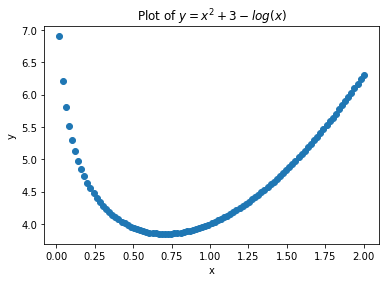

In [3]:
fig, ax = plt.subplots()

### YOUR CODE HERE
plt.scatter(x=x, y=y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $y = x^2 + 3 - log(x)$")
plt.show()

In [4]:
assert_equal(ax.get_xlabel(), 'x')
assert_equal(ax.get_ylabel(), 'y')
assert_equal(ax.get_title(), "Plot of $y = x^2 + 3 - log(x)$")

# Problem 2: Adding Legends

When we plot multiple functions, it can be confusing which line corresponds to which function. To fix this issue we can use a legend. Make a new plot showing both $y = x^2 + 3 - \log(x)$ and $y = x^2 + 3 + \log(x)$.

Furthermore:

1. Title the plot "Plot of $y = x^2 + 3 - \log(x)$ and $y = x^2 + 3 + \log(x)$"

2. Label the x-axis as `x`

3. Label the y-axis as `y`

4. Change the color of the plot for `y2` to red

5. Add a legend so that the line for `y2` is labeled "adding log(x)" and the line for y is labeled "subracting log(x)". IMPORTANT: Make sure you add the legend text in the same command as making the plot. See the corresponding notebook if you're confused. This is the generally preferred practice for labeling the legend.

In [5]:
# generate x values to calculate the function at
x = np.linspace(0, 2, num=100)

# calculate y
y2 = x**2 + 3 + np.log(x)

C:\Users\Dennis\AppData\Local\Temp\ipykernel_1328\1042146527.py:5: RuntimeWarning: divide by zero encountered in log
  y2 = x**2 + 3 + np.log(x)


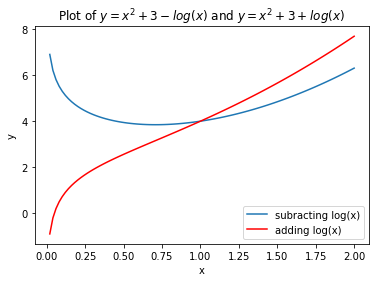

In [6]:
fig, ax = plt.subplots()

### YOUR CODE HERE

plt.plot(x, y, label="subracting log(x)")
plt.plot(x, y2, color="red", label="adding log(x)")
plt.title("Plot of $y = x^2 + 3 - log(x)$ and $y = x^2 + 3 + log(x)$")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

In [7]:
assert_equal(ax.get_title(), "Plot of $y = x^2 + 3 - log(x)$ and $y = x^2 + 3 + log(x)$")

if ax.lines[1].get_color() == 'red':
    assert_equal(ax.lines[1].get_color(), 'red')
else:
    assert_equal(ax.lines[0].get_color(), 'red')

if ax.legend().get_texts()[1].get_text() == 'adding log(x)':
    assert_equal(ax.legend().get_texts()[1].get_text(), 'adding log(x)')
else:
    assert_equal(ax.legend().get_texts()[0].get_text(), 'adding log(x)')

-----

For the next few problems we will use the dow jones index data, which is loaded in the below cell.

In [8]:
df = pd.read_csv('dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


# Problem 3:  Plotting the Distribution of Days Until Next Dividend for Stocks in the Dow Jones Index Using Rugplot

For this problem we have loaded in weekly stock data from dow jones index, it is stored in a variable called `df` and the first 5 rows of data are shown in a table above.

Your task is to finish the plot function below. This function should do the following:
- Create a 1-d rugplot of the column called `days_to_next_dividend`.
- Remove the numbers on the y-axis.
- Set a title for your plot.
- The function should return an `axes` object (we have created this variable for you already).

In [9]:
def rug_plot(df):
    '''
    df - dataframe containg dow jones weekly data
    function returns axes object
    '''
    fig, ax = plt.subplots(figsize=(10, 1.5))
    
    ### YOUR CODE HERE
    
    # Add a rug plot
    ax = sns.rugplot(df['days_to_next_dividend'])

    # Set the y-axis limits
    ax.set_yticks([])

    # Add a title
    ax.set_title('Rug Plot of Dow Jones Weekly Closing Prices')
    return ax

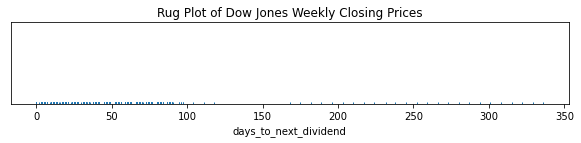

In [10]:
rp = rug_plot(df)
plt.show()
plt.close()

In [11]:
assert_is_instance(rp, mpl.axes.Axes, msg='Return a Axes object.')  
assert_is_not(len(rp.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(rp.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_equal(rp.yaxis.get_label_text(), '', msg="The y-axis should not have a label.")
assert_equal(rp.yaxis.get_ticklabels(), [], msg="Remove ticks from y-axis label.")

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 